In [1]:
from mlwpy import *
from helpers import *
iris = datasets.load_iris()

# Logistic Regression

##### About about Odds, LogOdds, and Probabilites

In [2]:
polo_df = make_polo_df()
polo_df

,Prob(E),Odds(E:not E),Log-Odds
Pct(%),,,
0.0%,0.0000,0.0000,-inf
1.0%,0.0100,0.0101,-4.5951
5.0%,0.0500,0.0526,-2.9444
10.0%,0.1000,0.1111,-2.1972
25.0%,0.2500,0.3333,-1.0986
50.0%,0.5000,1.0000,0.0000
75.0%,0.7500,3.0000,1.0986
90.0%,0.9000,9.0000,2.1972
95.0%,0.9500,19.0000,2.9444


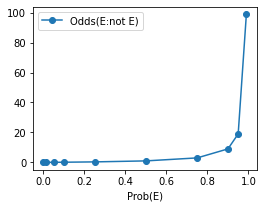

In [3]:
polo_df[:-1].plot.line(x='Prob(E)', y='Odds(E:not E)', marker='o');

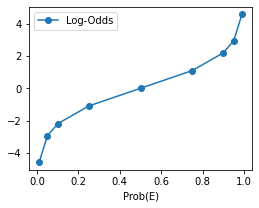

In [4]:
polo_df.plot.line(x='Prob(E)', y='Log-Odds', marker='o');

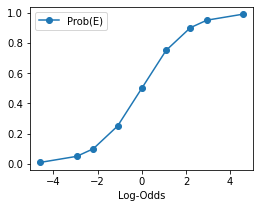

In [5]:
polo_df.plot.line(x='Log-Odds', y='Prob(E)', marker='o');

##### Predicting Probabilities


In [6]:
cd_df = make_cats_and_dogs(*cat_dog_nice_sep())

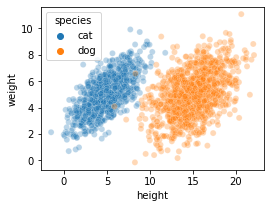

In [7]:
sns.scatterplot(data=cd_df, x="height", y="weight", 
                hue='species', alpha=.3);

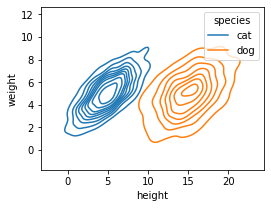

In [8]:
sns.kdeplot(data=cd_df, x='height', y='weight', 
            hue='species');

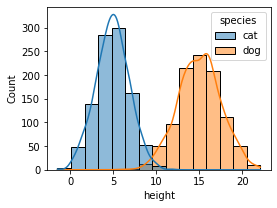

In [9]:
sns.histplot(data=cd_df, x='height', 
             hue='species', kde=True);

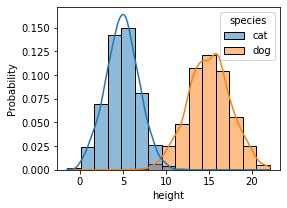

In [10]:
probs = (linear_model.LogisticRegression()
                     .fit(cd_df[['height']], cd_df['species'])
                     .predict_proba(cd_df[['height']]))

sort_dex   = np.argsort(cd_df['height'])
height_idx = cd_df.columns.get_loc('height')

#plt.plot(cd_df.iloc[sort_dex, height_idx],
#         probs[sort_dex, 0]);

sns.histplot(data=cd_df, x='height', hue='species', 
             kde=True, stat='probability');

##### Back to Two Features

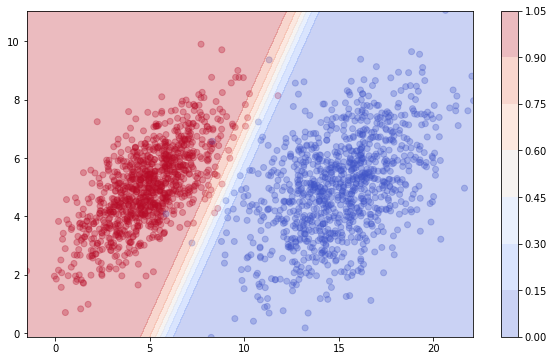

In [11]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
plot_contours(cd_df.values, cd_df['species']=='cat', [0,1],
              linear_model.LogisticRegression(),
              show_data=True)

##### Back to Iris

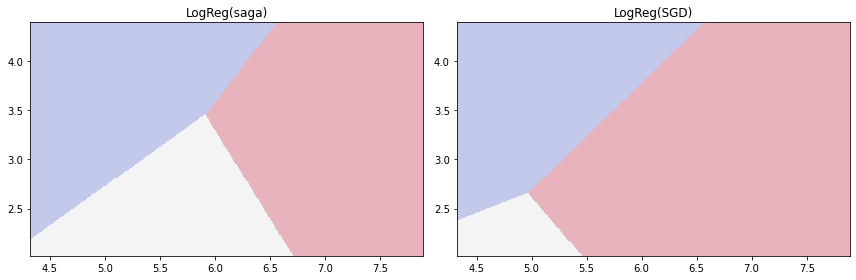

In [12]:
# using saga to allow "true" multinomial classification
# as opposed to multiple one-versus-rest
LogReg = linear_model.LogisticRegression
SGD    = linear_model.SGDClassifier

logreg_classifiers = {'LogReg(saga)': LogReg(solver='saga', 
                                             multi_class='multinomial',
                                             max_iter=1000),
                      'LogReg(SGD)' : SGD(loss='log', max_iter=1000)}

fig, axes = plt.subplots(1,2,figsize=(12,4))
for (name, mod), ax in zip(logreg_classifiers.items(), 
                           axes.flat):
    plot_boundary(iris.data, iris.target, [0,1], mod, ax=ax)
    ax.set_title(name)
plt.tight_layout()

# Discriminant Analysis

##### Covariance

In [13]:
X = np.array([1,3,5,10,20])
Y = np.array([2,4,1,-2,12])
n = len(X)

In [14]:
np.cov(X,Y, bias=True)

array([[46.16, 21.28],
       [21.28, 22.24]])

In [15]:
# cov(me, you) = sum (one of me - my_mean()) (one of you - your_mean())
# divide that by the total number of possib. ... n**2

# cov(me, you) = sum (one of me - other of me) (one of you - other of you)
# divide that by the total number of possib. ... n**2

In [16]:
cov_XX = 0.0
for x_i, x_j in it.combinations(X, 2):
    cov_XX += (x_i - x_j) ** 2
cov_XX / (n**2)

46.16

In [17]:
cov_XY = 0.0

xy_pairs = it.combinations(zip(X,Y), 2)
# gives us:
# (one of me, one of you) ... (other of me, other of you)
for (x_i, y_i), (x_j, y_j) in xy_pairs:
    cov_XY += (x_i - x_j) * (y_i - y_j)
cov_XY / (n**2)

21.28

##### Coloring Covariance Areas

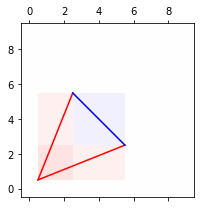

In [18]:
# pts at (1,1), (3,6), (6,3)
draw_cov_rectangles()

##### A Diagonal Covariance Matrix

In [19]:
data = pd.DataFrame({'X':[3, 6, 3, 4], 
                     'Y':[9, 6, 3, 0], 
                     'Z':[1, 4, 7, 0]})
data.index.name = 'examples'
display(data)

,X,Y,Z
examples,,,
0,3,9,1
1,6,6,4
2,3,3,7
3,4,0,0


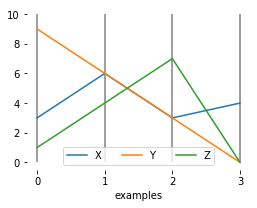

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
data.plot(ax=ax)
ax.vlines([0,1,2,3], 0, 10, colors=".5")

ax.legend(loc='lower center', ncol=3)

plt.box(False)
ax.set_xticks([0,1,2,3]);

In [21]:
display(data.cov())

,X,Y,Z
X,2.0000,0.0000,0.0000
Y,0.0000,15.0000,0.0000
Z,0.0000,0.0000,10.0000


##### Covariance Patterns

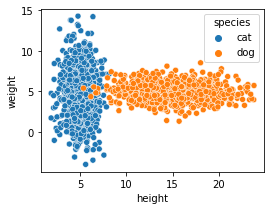

In [22]:
cd_df = make_cats_and_dogs(*cat_dog_no_con())
sns.scatterplot(data=cd_df, x="height", y="weight", 
                hue='species');

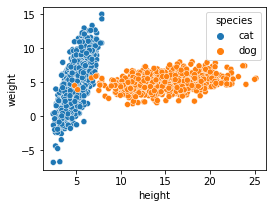

In [23]:
cd_df = make_cats_and_dogs(*cat_dog_with_con())
sns.scatterplot(data=cd_df, x="height", y="weight", 
                hue='species');

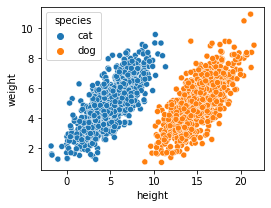

In [24]:
cd_df = make_cats_and_dogs(*cat_dog_same_cov())
sns.scatterplot(data=cd_df, x="height", y="weight", 
                hue='species');

In [ ]:
# DA methods make assumtions about the cov matrix:

# fewest assumptions:    different & not diagonal (QDA)
#      add costraint:  sameness (LDA), diagonality (GNB)
#   both constraints:        same & diagonal (DLDA)

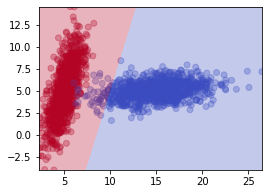

In [25]:
cd_df = make_cats_and_dogs(*cat_dog_with_con())
plot_boundary(cd_df[['height', 'weight']], 
              cd_df['species']=='cat', [0,1],
              discriminant_analysis.LinearDiscriminantAnalysis(), 
              show_data=True);

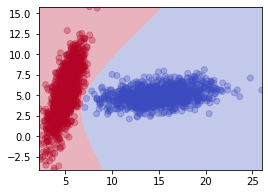

In [26]:
cd_df = make_cats_and_dogs(*cat_dog_with_con())
plot_boundary(cd_df[['height', 'weight']], 
              cd_df['species']=='cat', [0,1],
              discriminant_analysis.QuadraticDiscriminantAnalysis(), 
              show_data=True);

# Discriminant Analysis on Iris

In [27]:
iris_df = pd.DataFrame(iris.data,
                       columns=iris.feature_names)
iris_ftrs = iris.feature_names
iris_df['tgt'] = iris.target

In [28]:
qda  = discriminant_analysis.QuadraticDiscriminantAnalysis()
lda  = discriminant_analysis.LinearDiscriminantAnalysis()
gnb  = naive_bayes.GaussianNB()
dlda = DLDA() # from mlwpy.py

da_methods = [qda, lda, gnb, dlda]
names = ["QDA", "LDA", "GNB", "DLDA"]
    
train, test = skms.train_test_split(iris_df, 
                                    test_size=.33, 
                                    random_state=21)

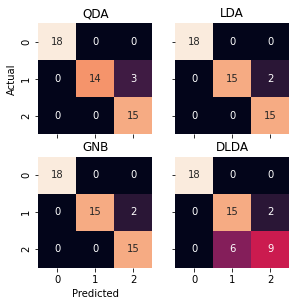

In [29]:
  
fig, axes = plt.subplots(2,2, figsize=(4.5, 4.5),
                         sharex=True, sharey = True)
for ax, model, name in zip(axes.flat, da_methods, names):
    mod_fit = model.fit(train[iris_ftrs], train['tgt'])
    preds = mod_fit.predict(test[iris_ftrs])
    
    cm = metrics.confusion_matrix(test['tgt'], preds)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax)
    ax.set_title(name)

axes[0,0].set_ylabel('Actual')
axes[1,0].set_xlabel('Predicted');

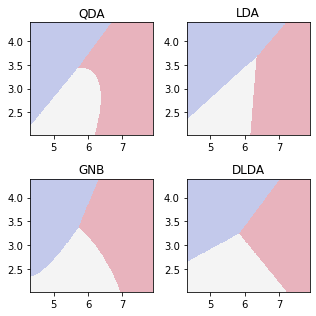

In [30]:
fig, axes = plt.subplots(2,2,figsize=(4.5, 4.5))
axes = axes.flat

for model, ax, name in zip(da_methods, axes, names):
    plot_boundary(iris.data, iris.target, [0,1], 
                  model, ax=ax)
    ax.set_title(name)
plt.tight_layout()

# Classifier Showdown

In [31]:
digits = datasets.load_digits()

Shape: (8, 8)


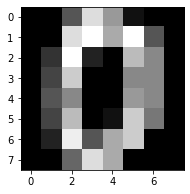

In [32]:
print("Shape:", digits.images[0].shape)
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0], cmap='gray');

In [34]:
digits.target[10]

0

In [36]:
classifier_parade = \
    {'LogReg(1)' : linear_model.LogisticRegression(max_iter=1000),
     'LogReg(2)' : linear_model.SGDClassifier(loss='log',
                                              max_iter=1000),

     'QDA' : discriminant_analysis.QuadraticDiscriminantAnalysis(),
     'LDA' : discriminant_analysis.LinearDiscriminantAnalysis(),
     'GNB' : naive_bayes.GaussianNB(),

     'SVC(1)' : svm.SVC(kernel="linear"),
     'SVC(2)' : svm.LinearSVC(),

     'DTC'    : tree.DecisionTreeClassifier(),
     '5NN-C'  : neighbors.KNeighborsClassifier(),
     '10NN-C' : neighbors.KNeighborsClassifier(n_neighbors=10)}

baseline = dummy.DummyClassifier(strategy="uniform")

base_score = skms.cross_val_score(baseline, 
                                  digits.data, digits.target, 
                                  cv=10, 
                                  scoring='f1_macro', 
                                  n_jobs=-1)

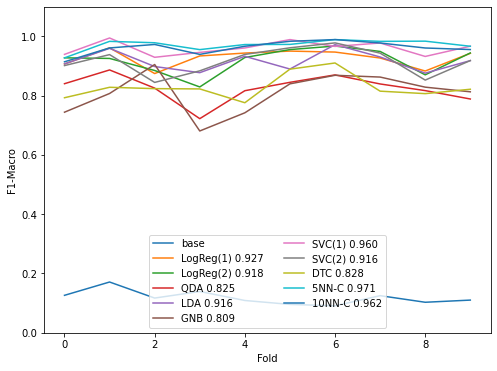

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(base_score, label='base')

results = []
for name, model in classifier_parade.items():    
    cv_scores = skms.cross_val_score(model, 
                                     digits.data, digits.target, 
                                     cv=10, 
                                     scoring='f1_macro', 
                                     n_jobs=-1) # all CPUs
    
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, label=my_lbl)#, marker=next(markers))
    results.append((name, cv_scores.mean()))

ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('F1-Macro')

ax.legend(loc='lower center', ncol=2);

In [38]:
(pd.DataFrame.from_records(results)
             .sort_values([1], ascending=False))

,0,1
8,5NN-C,0.9710
9,10NN-C,0.9618
5,SVC(1),0.9600
0,LogReg(1),0.9268
1,LogReg(2),0.9180
3,LDA,0.9159
6,SVC(2),0.9159
7,DTC,0.8285
2,QDA,0.8250
4,GNB,0.8090
